<a href="https://colab.research.google.com/github/AnuragGorkar/Data-Analysis-Documentations/blob/main/Data_Analysis_Using_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook heavily follows the PySpark tutorial from the [Spark by {Examples}](https://sparkbyexamples.com/pyspark-tutorial/) website. However unlike the documentation there in this drive along with a detailed explaination of the functions we will also go through a practical project.

To learn omre about RDD "Resilient Distributed Datasets" follow this [RDD tutorial](https://sparkbyexamples.com/pyspark-rdd/)

##Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


##Install PySpark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 34.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=05f7e543c5af2423b46c035b7c8950f80eadae83c85c21f23c71eac6200d572c
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


##Import Libraries

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc, count, col, max, struct, when, isnan
import matplotlib.pyplot as plt

##Spark Documentation codes

[**SparkSession**](https://sparkbyexamples.com/pyspark/pyspark-what-is-sparksession/)

> The SparkSession is an entry point to programming in spark.
The SparkSession class has attribute **builder** which is an API to configure the spark session. Each session is associated with a unique application name (appName). We can have multiple spark sessions associated with a single spark application. The common use case is to keep relational entities seperate logically in catelogs per SparkSession.


> The SparkSession allows for creating a dataframe based on RDD, creating a dataset, accessing a spark SQL query, loading a table and execute a DataFrameReader.






In [ ]:
spark = SparkSession.builder.appName("Spark Session").getOrCreate()

Set path to the CSV file.

In [ ]:
listening_csv_path = "/content/drive/MyDrive/Course Datasets/Data Analysis Using PySpark/listenings.csv"

[**spark.read()**](https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/)

> The spark.read() function provides multiple options to read files fo different types: csv, json, paraquet, jdbc, orc, libsvm and, text.

> The following options can be passed as attributes while reading a dataset:


*   ***delimiter***
> This option is used to specify the column delimiter of the CSV file. By default, it is **comma (,)**, but can be set to **pipe (|)**, **tab**, **space**, or any character using this option.

*   ***inferSchema***
> The default value set to this option is false when setting to true it automatically infers column types based on the data. Note that, it requires **reading the data one more time** to infer the schema.

*   ***header***
> This option is used to read the first line of the CSV file as column names. By default the value of this option is false , and all column types are assumed to be a string.

*   ***nullValues***
> Using nullValues option you can specify the string in a CSV to consider as null. For example, if you want to consider a date column with a value “1900-01-01” set null on DataFrame.

*   ***dateFormat***
> dateFormat option to used to set the format of the input DateType and TimestampType columns. Supports all java.text.SimpleDateFormat formats.






In [ ]:
listening_df = spark.read.format("csv").option("inferSchema", True).option("header", True).load(listening_csv_path)

**Read multiple CSV files**

> Using the spark.read.csv() method you can also read multiple CSV files, just pass all file names by separating comma as a path, for example 

```
val df = spark.read.csv("path1,path2,path3")
```

**Read all CSV files in directory**

>  We can read all CSV files from a directory into DataFrame just by passing the directory as a path to the csv() method.

```
val df = spark.read.csv("Folder path")
```

The type of the dataframe that is returned is a pyspark.DataFrame, which is different from a pandas.DataFrame in the sense that it is a distributed dataframe unlike the pandas.DataFrame. This provides the same **backend execution engine** thus we get similar performance irrespective of the API/language used. The dataframe provides a level of abstraction over the spark RDD.

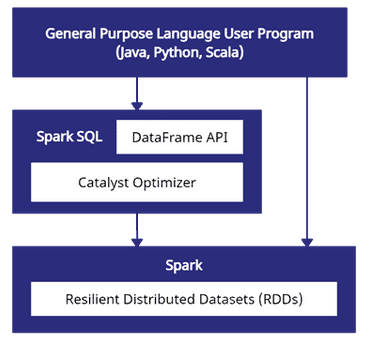

In [ ]:
print(listening_df)

DataFrame[user_id: string, track: string, artist: string, album: string]


In [ ]:
print(f"The data type returned by the read.csv() function is as folows {type(listening_df)}.")

[**df.show()**](https://sparkbyexamples.com/spark/spark-show-display-dataframe-contents-in-table/) function to display the spark dataframe.

In [ ]:
listening_df.show()

In [ ]:
#Show to first (top) 'N' rows in the dataset
listening_df.show(10)

[**df.dtypes**](https://sparkbyexamples.com/pyspark/pyspark-find-datatype-column-names-of-dataframe/) attribute to displlay the data types of all the columns in the spark data frame.

In [ ]:
# This returns a list of tuples with the [([column_name], [data_type]), ...]
listening_df.dtypes

[**df.printSchema()**](https://sparkbyexamples.com/pyspark/pyspark-printschema-example/) function of the spark dataframe object is used to display the schema of the spark dataframe.

In [ ]:
listening_df.printSchema()

[**df.columns**](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.columns.html) attribute of the spark dataframe is used to return a list of all the columns in the dataframe.

In [ ]:
print(f"The columns in the dataframe {listening_df.columns} are returned as a {type(listening_df.columns)}.")

[**df.count()**](https://www.geeksforgeeks.org/get-number-of-rows-and-columns-of-pyspark-dataframe/) function returns the total number of rows in the dataset. The return type of the function is integer/number

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
print(f"The shape of the dataframe is {shape}.")

The shape of the dataframe is (14650594, 4).


For this example the ***date*** column in the dataframe is considered irrelevant, thus we drop it from the dataframe.

In [ ]:
listening_df = listening_df.drop("date") #This returns a new spark dataframe which can be stored in a variable

In [ ]:
#Show the new dataframe
shape = (listening_df.count(), len(listening_df.columns))
print(f"The shape of the dataframe after dropping the 'date' column is {shape}.\n")
listening_df.show()

[**df.limit()**](https://sparkbyexamples.com/spark/show-top-n-rows-in-spark-pyspark/) In PySpark, limit() is a DataFrame transformation that returns a DataFrame with top N rows, for Spark with Scala/Java it returns a Dataset.

In [ ]:
subset_df = listening_df.limit(10)
subset_shape = (subset_df.count(), len(subset_df.columns))
print(f"The shape of the subset dataframe is {subset_shape}.")

The shape of the subset dataframe is (10, 4).


This [article](https://sparkbyexamples.com/spark/show-top-n-rows-in-spark-pyspark/) gives detailed information regarding the following functions in spark dataframe:

*   take()
*   tail()
*   collect()
*   head()
*   first()

[**df.select()**](https://sparkbyexamples.com/pyspark/select-columns-from-pyspark-dataframe/) function in PySpark allows you to select a particular column in the dataframe. The select function in PySpark is a transformation function which returns a dataframe which is immutable.

In [ ]:
# As the select() function returns a dataframe we can use other dataframe functions on it (like .show() here)
listening_df.select("artist", "album").show(30)
# Columns can also be selected using the column attribute in Spark
listening_df.select(col("artist"), col("album")).show(20)

[**df.colRegex()**](https://spark.apache.org/docs/3.2.1/api/python/reference/api/pyspark.sql.DataFrame.colRegex.html) function in the dataframe allows us to select the columns using a specific regular expression


---

Use this website to learn, implement and test regular expressions [Pythex](https://pythex.org/)

In [ ]:
listening_df.select(listening_df.colRegex("`^*a*`")).show(10)

In [ ]:
#To select all columns from the list 
listening_df.select("*").show(5)
listening_df.select([col for col in listening_df.columns]).show(10)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows

+-----------+--------------------+------------+--------------------+
|    user_id|               track|      artist|               album|
+-----------+--------------------+------------+--------------------+
|000Silenced|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|       Robyn|            Be M

**distinct()** function in spark returns a dataframe with distinct values for each column. 

Select nested **Struct** column from PySpark

**Difference between Null and NaN in python**

*   NaN can be used as a numerical value on mathematical operations, while None cannot (or at least shouldn't).

*   NaN is a numeric value, as defined in IEEE 754 floating-point standard. None is an internal Python type (NoneType) and would be more like "inexistent" or "empty" than "numerically invalid" in this context.

*   In Python None is equal to null value.







In [ ]:
#Drop all the rows which have NA values in the dataframe
listening_df = listening_df.na.drop()

**Count the NULL / NA / empty values in the dataset**

For this code we use the following functions:
*   [select()](https://sparkbyexamples.com/pyspark/select-columns-from-pyspark-dataframe/)
*   [alias()](https://sparkbyexamples.com/pyspark/pyspark-alias-column-examples/)
*   [count()](https://sparkbyexamples.com/pyspark/pyspark-count-distinct-from-dataframe/)
*   [when().otherwise()](https://sparkbyexamples.com/pyspark/pyspark-when-otherwise/)


---
This code line basically selects the columns from the datafrane by iterating through the columns list from the dataframe. For each column in the dataframe we count the number of rows which satisfy the conditions using when().otherwise() functions provided by pyspark.sql.functions.







In [ ]:
listening_df.select([count(when(col(c).contains('None') | 
                                col(c).contains('Null') | 
                                (col(c) == "") | 
                                (col(c) == '' ) | 
                                col(c).isNull() | 
                                isnan(c), c 
                                )).alias(c) 
                                for c in listening_df.columns]).show()

+-------+-----+------+-----+
|user_id|track|artist|album|
+-------+-----+------+-----+
|    196| 2394|  1422| 3928|
+-------+-----+------+-----+



In [ ]:
#Select two columns artist and track from the dataframe
temp_df = listening_df.select("artist", "track")

In [ ]:
temp_df.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**df.collect()** is an action operation that is used to retrieve all the elements of the dataset (from all nodes) to the driver node. We should use the collect() on smaller dataset usually after filter(), group() e.t.c. Retrieving larger datasets results in OutOfMemory error.

> It does not return a DataFrame instead, it returns data in an Array to the driver. Once the data is in an array, you can use python for loop to process it further.



